In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings 
#warnings.filterwarnings("ignore")
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.svm import SVC # Support Vector Classifier model 
from sklearn.pipeline import Pipeline
import utils

In [3]:
# Setting Custom function for saving figures and getting data
import importlib
importlib.reload(utils)

<module 'utils' from '/home/abhishek/Desktop/sign-language-classifier/utils.py'>

In [4]:
X_train, y_train, X_test, y_test = utils.load_dataset()

# SVM WITH PCA

In [5]:
# no of principal component from exploratory data analysis
svc= Pipeline([('reduce_dims', PCA(n_components=113)),('model', SVC())])

In [6]:
# fit the model 
svc.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)), ('model', SVC())])

In [7]:
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [8]:
# Accuracy of the model
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("SVM Accuracy on training Data: ", acc_train_svc)
print("SVM Accuracy on test Data: ", acc_test_svc)

SVM Accuracy on training Data:  0.9999635767619741
SVM Accuracy on test Data:  0.8510875627440044


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       331
           1       1.00      0.99      1.00       432
           2       0.88      0.99      0.93       310
           3       0.95      1.00      0.97       245
           4       0.94      0.99      0.97       498
           5       0.76      0.83      0.80       247
           6       0.94      0.90      0.92       348
           7       0.97      0.95      0.96       436
           8       0.82      0.90      0.85       288
          10       0.81      0.66      0.73       331
          11       0.87      1.00      0.93       209
          12       0.84      0.73      0.78       394
          13       0.90      0.67      0.77       291
          14       0.95      0.85      0.89       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       0.33      0.61      0.43       144
          18       0.72    

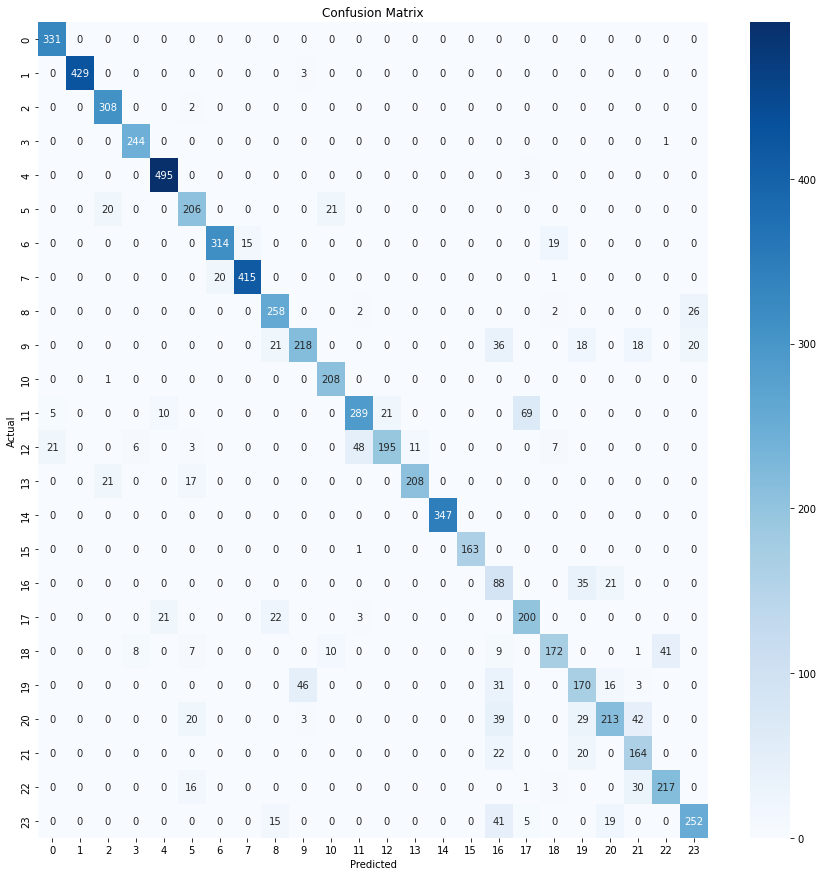

In [9]:
utils.save_results(y_test, y_test_svc, "svc")

## KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
knn = Pipeline([('reduce_dims', PCA(n_components=113)),('model', KNeighborsClassifier())])
knn.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', KNeighborsClassifier())])

In [11]:
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

/home/abhishek/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/abhishek/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

In [12]:
train_acc_knn = metrics.accuracy_score(y_train,y_train_knn)
test_acc_knn = metrics.accuracy_score(y_test,y_test_knn)

print("KNN accuracy on training: ",train_acc_knn)
print("KNN accuracy on test: ",test_acc_knn)

KNN accuracy on training:  0.9987980331451466
KNN accuracy on test:  0.8139988845510318


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       0.94      0.93      0.93       432
           2       0.97      1.00      0.98       310
           3       0.76      0.94      0.84       245
           4       0.79      0.97      0.87       498
           5       0.88      0.93      0.91       247
           6       0.91      0.94      0.92       348
           7       0.96      0.95      0.95       436
           8       0.86      0.69      0.77       288
          10       0.82      0.59      0.69       331
          11       0.95      0.93      0.94       209
          12       0.79      0.52      0.63       394
          13       0.79      0.64      0.70       291
          14       1.00      0.92      0.96       246
          15       0.99      1.00      1.00       347
          16       0.95      1.00      0.97       164
          17       0.33      0.61      0.43       144
          18       0.67    

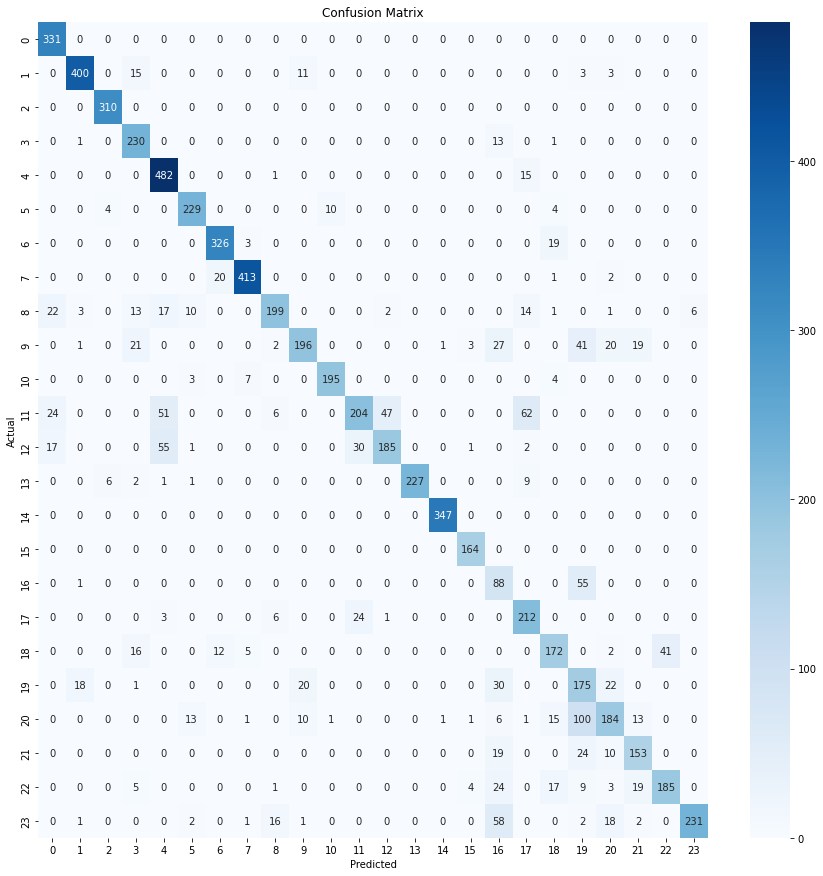

In [13]:
utils.save_results(y_test, y_test_knn,"knn")